In [8]:
##載入套件
from apyori import apriori 

In [9]:
##定義數據
Groceries_data = [['citrus fruit','semi-finished bread','margarine',
                   'ready soups','yogurt','coffee','whole milk','cream cheese'],
                  ['citrus fruit','margarine'],
                 ['ready soups','coffee','yogurt','whole milk'],
                 ['margarine','semi-finished bread','whole milk'],
                 ['cream cheese','coffee'],
                 ['cream cheese','ready soups'],
                 ['citrus fruit'],
                 ['coffee','ready soups'],]

association_rules = apriori(Groceries_data, min_support=0.001, min_confidence=0.2, min_lift=2, max_length=2)
association_results = list(association_rules)
                                

In [10]:
##print(association_results )
for product in association_results:
 pair = product[0] 
 ##print(pair) ## ex. frozenset({'Basketball', 'Socks'})
 products = [x for x in pair]
 print(products) # ex. ['Basketball', 'Socks']
 print("Rule: " + products[0] + " →" + products[1])
 print("Support: " + str(product[1]))
 print("Lift: " + str(product[2][0][3]))
 print("==================================")

['coffee', 'yogurt']
Rule: coffee →yogurt
Support: 0.25
Lift: 2.0
['semi-finished bread', 'margarine']
Rule: semi-finished bread →margarine
Support: 0.25
Lift: 2.6666666666666665
['ready soups', 'yogurt']
Rule: ready soups →yogurt
Support: 0.25
Lift: 2.0
['semi-finished bread', 'whole milk']
Rule: semi-finished bread →whole milk
Support: 0.25
Lift: 2.6666666666666665
['semi-finished bread', 'yogurt']
Rule: semi-finished bread →yogurt
Support: 0.125
Lift: 2.0
['whole milk', 'yogurt']
Rule: whole milk →yogurt
Support: 0.25
Lift: 2.6666666666666665


In [11]:
##數據轉成one-hot編碼
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [12]:
Groceries_data = {
 'Transaction ID': [1,2,3,4,5,6,7,8],
 'Items':[['citrus fruit','semi-finished bread','margarine',
                   'ready soups','yogurt','coffee','whole milk','cream cheese'],
                  ['citrus fruit','margarine'],
                 ['ready soups','coffee','yogurt','whole milk'],
                 ['margarine','semi-finished bread','whole milk'],
                 ['cream cheese','coffee'],
                 ['cream cheese','ready soups'],
                 ['citrus fruit'],
                 ['coffee','ready soups']]}

## 轉成DataFrame
data = pd.DataFrame(Groceries_data)
## 讓DataFrame 能呈現的寬度大一點
pd.options.display.max_colwidth = 100
## 轉成數值編碼，目前都是字串的組合
data_id = data.drop('Items', 1)
data_items = data.Items.str.join(',')
## 轉成數值
data_items = data_items.str.get_dummies(',')
## 接上Transaction ID
data = data_id.join(data_items)

## 計算支持度 Support
Support_items = apriori(data[['citrus fruit','semi-finished bread','margarine',
                   'ready soups','yogurt','coffee','whole milk','cream cheese' ]], min_support=0.20, use_colnames = True)
Association_Rules = association_rules(Support_items, metric = 'lift', min_threshold=1)

Association_Rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(margarine),(citrus fruit),0.375,0.375,0.25,0.666667,1.777778,0.109375,1.875
1,(citrus fruit),(margarine),0.375,0.375,0.25,0.666667,1.777778,0.109375,1.875
2,(semi-finished bread),(margarine),0.250,0.375,0.25,1.000000,2.666667,0.156250,inf
3,(margarine),(semi-finished bread),0.375,0.250,0.25,0.666667,2.666667,0.156250,2.250
4,(semi-finished bread),(whole milk),0.250,0.375,0.25,1.000000,2.666667,0.156250,inf
...,...,...,...,...,...,...,...,...,...
63,"(whole milk, yogurt)","(coffee, ready soups)",0.250,0.375,0.25,1.000000,2.666667,0.156250,inf
64,(coffee),"(ready soups, whole milk, yogurt)",0.500,0.250,0.25,0.500000,2.000000,0.125000,1.500
65,(ready soups),"(coffee, whole milk, yogurt)",0.500,0.250,0.25,0.500000,2.000000,0.125000,1.500
66,(whole milk),"(coffee, ready soups, yogurt)",0.375,0.250,0.25,0.666667,2.666667,0.156250,2.250


In [6]:
##載入視覺化套件
import pandas as pd
import matplotlib.pyplot as plt

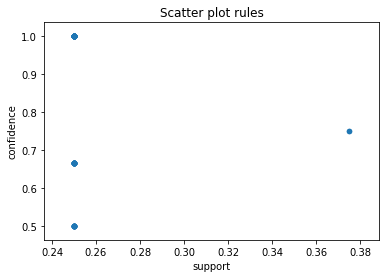

In [13]:
Association_Rules.plot(kind='scatter',x='support', y='confidence',title='Scatter plot rules') 